# SVM

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

x = np.linspace(-5.0,5.0,100)
y = np.sqrt(10**2-x**2)
y = np.hstack([y,-y])
x = np.hstack([x,-x])

In [3]:
x1 = np.linspace(-5.0,5.0,100)
y1 = np.sqrt(5**2-x1**2)
y1 = np.hstack([y1,-y1])
x1 = np.hstack([x1,-x1])

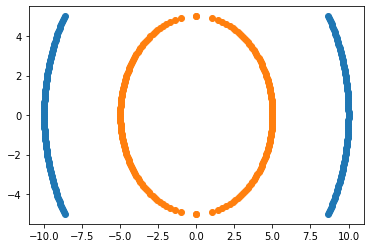

In [4]:
plt.scatter(y,x)
plt.scatter(y1,x1)
plt.show()

In [5]:
df1 = pd.DataFrame(np.vstack([y,x]).T,columns = ['x1','x2'])
df1['Y'] = 0

In [6]:
df1

,x1,x2,Y
0,8.660254,-5.00000,0
1,8.717792,-4.89899,0
2,8.773790,-4.79798,0
3,8.828277,-4.69697,0
4,8.881281,-4.59596,0
...,...,...,...
195,-8.881281,-4.59596,0
196,-8.828277,-4.69697,0
197,-8.773790,-4.79798,0
198,-8.717792,-4.89899,0


In [7]:
df2 = pd.DataFrame(np.vstack([y1,x1]).T,columns = ['x1','x2'])
df2['Y'] = 1
df = df1.append(df2)

In [8]:
df.shape

(400, 3)

In [9]:
x = df.iloc[:,:2]
y = df.Y

In [10]:
y

0      0
1      0
2      0
3      0
4      0
      ..
195    1
196    1
197    1
198    1
199    1
Name: Y, Length: 400, dtype: int64

In [11]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size = 0.25,random_state = 0)

In [12]:
from sklearn.svm import SVC
classifier = SVC(kernel='linear')
classifier.fit(X_train,y_train)

SVC(kernel='linear')

In [28]:
y_pred = classifier.predict(X_test)

In [29]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.45

# Polynomial Kernel

In [30]:
df['X1_Square'] = df['x1']**2
df['X2_Square'] = df['x2']**2
df['X1*X2'] = (df['x1']**df['x2'])
df.head()

,x1,x2,Y,X1_Square,X2_Square,X1*X2
0,8.660254,-5.00000,0,75.000000,25.000000,0.000021
1,8.717792,-4.89899,0,75.999898,24.000102,0.000025
2,8.773790,-4.79798,0,76.979390,23.020610,0.000030
3,8.828277,-4.69697,0,77.938476,22.061524,0.000036
4,8.881281,-4.59596,0,78.877155,21.122845,0.000044


In [31]:
X = df[['x1','x2','X1_Square','X2_Square','X1*X2']]
Y = df.Y

In [32]:
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size = 0.25,random_state = 0)

In [33]:
X_train

,x1,x2,X1_Square,X2_Square,X1*X2
50,4.999745,0.050505,24.997449,0.002551,1.084677
63,9.906589,1.363636,98.140496,1.859504,22.807535
112,-3.263736,3.787879,10.651974,14.348026,NaN
159,-9.953852,-0.959596,99.079176,0.920824,NaN
83,3.680983,3.383838,13.549638,11.450362,82.248915
...,...,...,...,...,...
123,-4.223140,2.676768,17.834915,7.165085,NaN
192,-9.031653,-4.292929,81.570758,18.429242,NaN
117,-9.445795,3.282828,89.223038,10.776962,NaN
47,9.996811,-0.252525,99.936231,0.063769,0.559126


In [1]:
import plotly.express as px
fig = px.scatter_3d(df,x = 'x1',y='x2',z='X1*X2',color = 'Y')
fig.show()

NameError: name 'df' is not defined

In [35]:
fig = px.scatter_3d(df,x = 'X1_Square',y='X2_Square',z='X1*X2',color = 'Y')
fig.show()

# SVM on iris dataset

In [36]:
from sklearn.datasets import load_iris
iris = load_iris()

In [37]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [38]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [39]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [40]:
iris.data

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [41]:
iris_df =pd.DataFrame(iris.data)

In [42]:
iris_df.columns = iris.feature_names

In [43]:
iris_df['class'] = iris.target

In [44]:
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [45]:
X = iris_df.iloc[:,1:5]
y = iris_df['class']

In [46]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
scaler = StandardScaler()
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [47]:
X_train= scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [48]:
from sklearn.svm import SVC
classifier = SVC(kernel='linear')

In [49]:
classifier.fit(X_train,y_train)

SVC(kernel='linear')

In [50]:
y_pred = classifier.predict(X_test)

In [51]:
y_pred

array([0, 0, 2, 0, 0, 2, 0, 2, 2, 0, 0, 0, 0, 0, 1, 1, 0, 1, 2, 1, 1, 1,
       2, 1, 1, 0, 0, 2, 0, 2])

In [52]:
from sklearn.metrics import accuracy_score,confusion_matrix
accuracy_score(y_test,y_pred)

1.0

In [53]:
classifier.predict([[5.1,3.5,1.4,0.2]])

array([1])

In [54]:
confusion_matrix(y_test,y_pred)

array([[14,  0,  0],
       [ 0,  8,  0],
       [ 0,  0,  8]], dtype=int64)

# Make blobs

In [55]:
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix,accuracy_score
import plotly.express as px

In [56]:
blob_random_seed = 42
centers = [(0,0),(5,5)]
cluster_std = 1
frac_test_split = 0.33
num_features_for_samples = 2
num_samples_total = 1000

In [57]:
inputs,target = make_blobs(n_samples = num_samples_total, centers= centers, n_features = num_features_for_samples, cluster_std=cluster_std)

In [58]:
target.shape

(1000,)

In [59]:
X_train,X_test,y_train,y_test = train_test_split(inputs,target, test_size=frac_test_split,random_state=blob_random_seed)

In [60]:
print("X train shape ",X_train.shape)
print('X test shape ',X_test.shape)
print('y train shape ',y_train.shape)
print('y test shape ',y_test.shape)

X train shape  (670, 2)
X test shape  (330, 2)
y train shape  (670,)
y test shape  (330,)


In [61]:
fig = px.scatter_3d(x = X_train[:,0],y=X_train[:,1],z = y_train[:],title = "Linearly separable points",color = y_train)
fig.show()

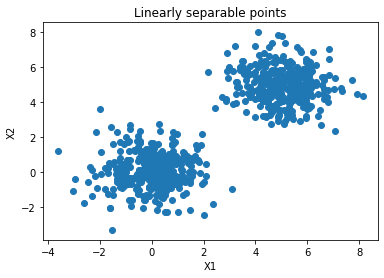

In [87]:
plt.scatter(X_train[:,0],X_train[:,1])
plt.title("Linearly separable points")
plt.xlabel("X1")
plt.ylabel("X2")
plt.show()

In [94]:
classifier = SVC(kernel='linear')
classifier.fit(X_train,y_train)

SVC(kernel='linear')

In [97]:
y_pred = classifier.predict(X_test)

In [98]:
accuracy_score(y_test,y_pred)

0.996969696969697

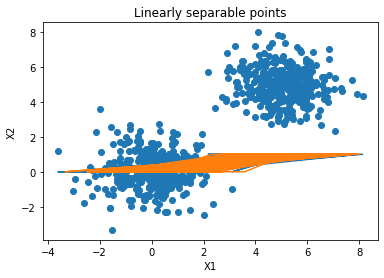

In [102]:
plt.scatter(X_train[:,0],X_train[:,1])
plt.plot(X_train,classifier.predict(X_train))
plt.title("Linearly separable points")
plt.xlabel("X1")
plt.ylabel("X2")
plt.show()

In [105]:
fig = px.scatter_3d(x = X_train[:,0],y=X_train[:,1],z = y_train[:],title = "Linearly separable points",color = y_train)
fig.show()

In [106]:
confusion_matrix(y_test,y_pred)

array([[165,   0],
       [  1, 164]], dtype=int64)